## Supply Dataset

In [132]:
# Main Library
from datetime import datetime

import pandas as pd
import numpy as np

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Acquisition

In [133]:
# Load Dataset
dataset = pd.read_csv("dataset/dataset-supply.csv", parse_dates=['Ship Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship Date     8092 non-null   datetime64[ns]
 1   Month         8092 non-null   object        
 2   Year          8092 non-null   int64         
 3   Ship Mode     8092 non-null   object        
 4   Area          8092 non-null   object        
 5   Region        8092 non-null   object        
 6   Category      8092 non-null   object        
 7   Sub-Category  8092 non-null   object        
 8   Sold          8092 non-null   int64         
 9   Profit        8092 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 632.3+ KB


In [134]:
# Show Original Dataset
print(dataset)

      Ship Date     Month  Year       Ship Mode        Area Region         Category Sub-Category  Sold   Profit
0    2016-11-11  November  2016    Second Class        Jawa  South        Furniture    Bookcases   270   503000
1    2016-11-11  November  2016    Second Class     Sumatra  South        Furniture       Chairs   740  2635000
2    2016-06-16      Juni  2016    Second Class        Bali   West  Office Supplies       Labels    20    82500
3    2015-10-18   Oktober  2015  Standard Class       Papua  South  Office Supplies      Storage    30    30200
4    2014-06-14      Juni  2014  Standard Class    Sulawesi   West        Furniture  Furnishings    50   170100
...         ...       ...   ...             ...         ...    ...              ...          ...   ...      ...
8087 2014-01-23   Januari  2014    Second Class    Sulawesi  South        Furniture  Furnishings    30    49300
8088 2017-03-03     Maret  2017  Standard Class  Kalimantan   West        Furniture  Furnishings   100  

### 2. Exploration Data Analysis (EDA)

In [135]:
print("Min Date : ", dataset['Ship Date'].min())
print("Max Date : ", dataset['Ship Date'].max())

Min Date :  2014-01-07 00:00:00
Max Date :  2017-12-31 00:00:00


In [136]:
print(dataset['Month'].unique())

['November' 'Juni' 'Oktober' 'April' 'Desember' 'Mei' 'September'
 'Januari' 'Juli' 'Maret' 'Februari' 'Agustus']


In [137]:
dataset['Year'].sort_values().unique()

array([2014, 2015, 2016, 2017])

In [138]:
print(dataset['Ship Mode'].sort_values().unique())

['First Class' 'Same Day' 'Second Class' 'Standard Class']


In [139]:
print(dataset['Area'].sort_values().unique())

['Bali' 'Jawa' 'Kalimantan' 'Papua' 'Sulawesi' 'Sumatra']


In [140]:
print(dataset['Region'].sort_values().unique())

['Central' 'East' 'South' 'West']


In [141]:
print(dataset['Category'].sort_values().unique())

['Furniture' 'Office Supplies' 'Technology']


In [142]:
print(dataset['Sub-Category'].sort_values().unique())

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


In [143]:
print("Feature Sold")
print("Min Value    : ", dataset['Sold'].min())
print("Max Value    : ", dataset['Sold'].max())
print("Avg Value    : ", dataset['Sold'].mean().round(2))

Feature Sold
Min Value    :  10
Max Value    :  17500
Avg Value    :  230.09


In [144]:
print("Feature Profit")
print("Min Value    : ", dataset['Profit'].min())
print("Max Value    : ", dataset['Profit'].max())
print("Avg Value    : ", dataset['Profit'].mean().round(2))

Feature Profit
Min Value    :  0
Max Value    :  100799800
Avg Value    :  654596.49


In [145]:
np.round(dataset["Sold"].mean(),2)

230.09

### 3. Data Praprocess

In [146]:
df_area = dataset.groupby("Area")[["Sold"]].aggregate("sum").reset_index().sort_values("Sold", ascending=False)
df_area


,Area,Sold
3,Papua,388360
2,Kalimantan,360940
4,Sulawesi,347260
5,Sumatra,269180
1,Jawa,251500
0,Bali,244660


In [147]:
df_area["Sold"].sum()

1861900

In [148]:
df_area["Percent"] = (df_area["Sold"] / df_area["Sold"].sum()) * 100
df_area

,Area,Sold,Percent
3,Papua,388360,20.858263
2,Kalimantan,360940,19.385574
4,Sulawesi,347260,18.650841
5,Sumatra,269180,14.457275
1,Jawa,251500,13.507707
0,Bali,244660,13.140341


In [149]:
df_area["Percent"].sum()

100.0

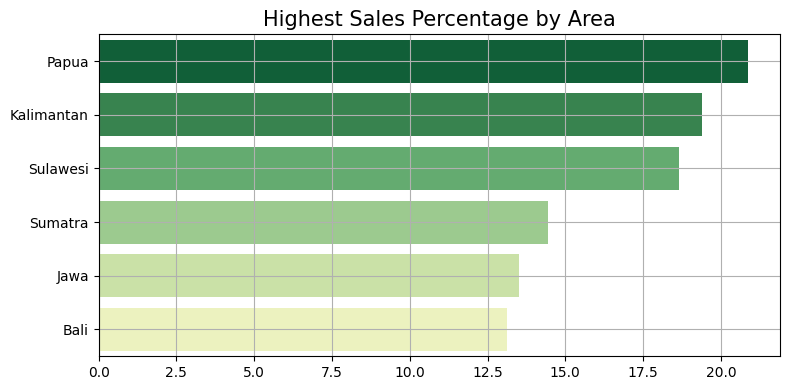

In [150]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_area, x="Percent", y="Area", hue="Area", palette="YlGn_r")

ax.set_title('Highest Sales Percentage by Area', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

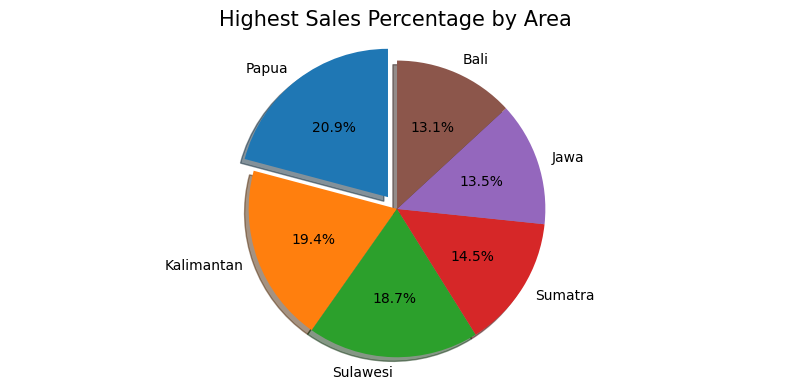

In [151]:
labels = df_area["Area"].unique()
sizes = df_area["Percent"]
explode = (0.1, 0, 0, 0,  0, 0)

fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax1.set_title('Highest Sales Percentage by Area', fontsize=15)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax1.grid(True)
# ax1.legend(loc="best")

plt.tight_layout()
plt.show()


In [152]:
df_year = dataset.groupby("Year")["Sold"].aggregate("sum").reset_index().sort_values("Year", ascending=True)
df_year

,Year,Sold
0,2014,353140
1,2015,395380
2,2016,516500
3,2017,596880


In [153]:
df_year["Sold"].sum()

1861900

In [154]:
df_year["Percent"] = (df_year["Sold"] / df_year["Sold"].sum()) * 100

In [155]:
df_year

,Year,Sold,Percent
0,2014,353140,18.966647
1,2015,395380,21.235297
2,2016,516500,27.740480
3,2017,596880,32.057576


In [156]:
df_year["Percent"].sum()

100.0

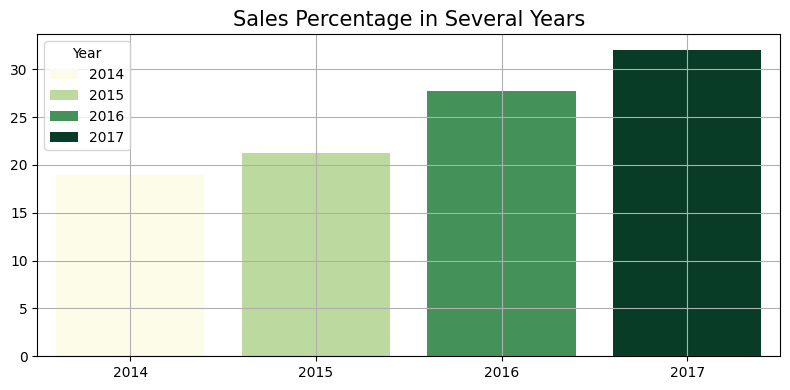

In [157]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_year, x="Year", y="Percent", hue="Year", palette="YlGn")

ax.set_title('Sales Percentage in Several Years', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

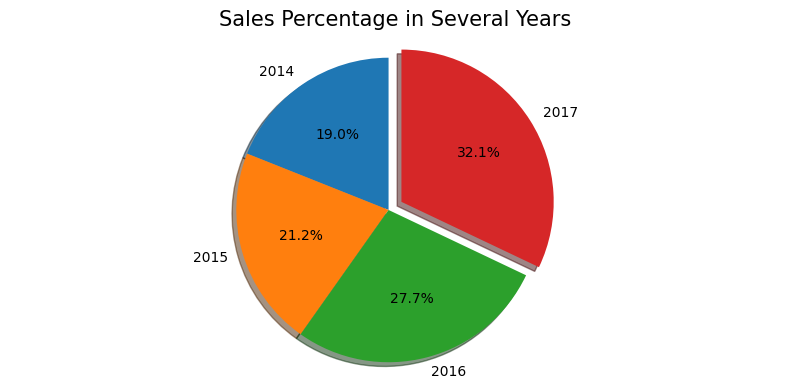

In [158]:
labels = df_year["Year"].unique()
sizes = df_year["Percent"]
explode = (0, 0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

ax1.set_title('Sales Percentage in Several Years', fontsize=15)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax1.grid(True)
# ax1.legend(loc="best")

plt.tight_layout()
plt.show()


In [159]:
df_region = dataset.groupby("Region")["Sold"].aggregate("sum").reset_index().sort_values("Region", ascending=True)
df_region

,Region,Sold
0,Central,366700
1,East,527760
2,South,304740
3,West,662700


In [160]:
df_region["Sold"].sum()

1861900

In [161]:
df_region["Percent"] = (df_region["Sold"] / df_region["Sold"].sum()) * 100

In [162]:
df_region

,Region,Sold,Percent
0,Central,366700,19.694935
1,East,527760,28.345239
2,South,304740,16.367152
3,West,662700,35.592674


In [163]:
df_region["Percent"].sum()

100.00000000000001

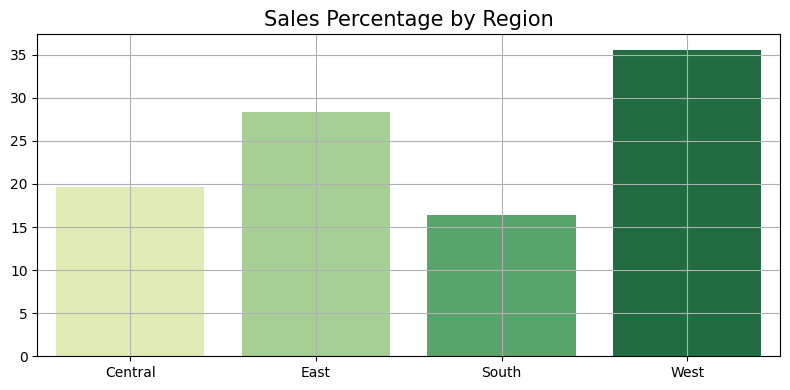

In [164]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_region, x="Region", y="Percent", hue="Region", palette="YlGn")

ax.set_title('Sales Percentage by Region', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

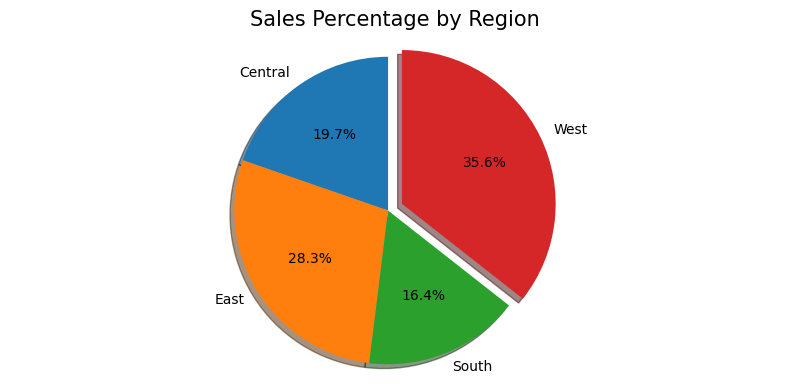

In [165]:
labels = df_region["Region"].unique()
sizes = df_region["Percent"]
explode = (0, 0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

ax1.set_title('Sales Percentage by Region', fontsize=15)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax1.grid(True)
# ax1.legend(loc="best")

plt.tight_layout()
plt.show()


In [166]:
df_region["Region"].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [167]:
print("First and Last Date")
print("Min Value    : ", dataset['Ship Date'].min())
print("Max Value    : ", dataset['Ship Date'].max())
print("    Value    : ", dataset['Profit'].count())

First and Last Date
Min Value    :  2014-01-07 00:00:00
Max Value    :  2017-12-31 00:00:00
    Value    :  8092


In [168]:
df_month_all_category = dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%Y-%m-%d').sort_values(ascending=True)
df_month_all_category

5886   2014-01-07
6502   2014-01-07
581    2014-01-08
4338   2014-01-08
6111   2014-01-10
          ...    
87     2017-12-30
4190   2017-12-31
4191   2017-12-31
2343   2017-12-31
2016   2017-12-31
Name: Ship Date, Length: 8092, dtype: datetime64[ns]

In [169]:
# df_month = dataset.loc[(dataset['Ship Date'] >= '2014-01-07') & (dataset['Ship Date'] < '2017-12-31') & dataset['Ship Date'].dt.weekday == 6]

df_month_all_category = dataset.loc[
    (dataset['Ship Date'] >= '2014-01-07') & 
    # (dataset['Ship Date'].dt.weekday == 6) &
    (dataset['Ship Date'] < '2017-12-31') 
]

df_month_all_category.sort_values(by="Ship Date", ascending=True).head(5)

,Ship Date,Month,Year,Ship Mode,Area,Region,Category,Sub-Category,Sold,Profit
5886,2014-01-07,Januari,2014,First Class,Papua,South,Office Supplies,Art,20,62900
6502,2014-01-07,Januari,2014,Standard Class,Bali,Central,Office Supplies,Paper,20,66700
581,2014-01-08,Januari,2014,Standard Class,Kalimantan,Central,Office Supplies,Labels,20,51300
4338,2014-01-08,Januari,2014,Second Class,Sulawesi,West,Office Supplies,Paper,20,112000
6108,2014-01-10,Januari,2014,Standard Class,Sumatra,South,Office Supplies,Art,10,17800


In [170]:
start_of_month_dates = pd.date_range(start='2014-01-01', end='2017-12-31', freq='MS')
df_month_all_category = df_month_all_category[df_month_all_category['Ship Date'].isin(start_of_month_dates)]
df_month_all_category

,Ship Date,Month,Year,Ship Mode,Area,Region,Category,Sub-Category,Sold,Profit
15,2014-09-01,September,2014,Second Class,Jawa,West,Office Supplies,Art,10,29800
16,2014-09-01,September,2014,Second Class,Sumatra,West,Technology,Phones,220,192200
17,2014-09-01,September,2014,Second Class,Bali,West,Office Supplies,Binders,30,88700
174,2016-11-01,November,2016,Standard Class,Jawa,West,Office Supplies,Storage,100,312700
175,2016-11-01,November,2016,Standard Class,Sumatra,West,Technology,Phones,310,272200
...,...,...,...,...,...,...,...,...,...,...
7952,2016-10-01,Oktober,2016,Standard Class,Papua,West,Technology,Copiers,480,1944000
7953,2016-10-01,Oktober,2016,Standard Class,Sulawesi,West,Technology,Phones,50,53700
7954,2016-10-01,Oktober,2016,Standard Class,Kalimantan,West,Office Supplies,Art,10,20100
7955,2016-10-01,Oktober,2016,Standard Class,Kalimantan,West,Furniture,Chairs,490,724800


In [171]:
df_month = df_month_all_category.groupby("Ship Date")["Sold"].aggregate("sum").reset_index().sort_values("Ship Date", ascending=True)
df_month

,Ship Date,Sold
0,2014-04-01,1280
1,2014-05-01,80
2,2014-06-01,2140
3,2014-07-01,630
4,2014-08-01,390
5,2014-09-01,470
6,2014-10-01,3520
7,2014-11-01,300
8,2014-12-01,1130
9,2015-01-01,3480


In [172]:
df_month["Percent"] = (df_month["Sold"] / df_month["Sold"].sum()) * 100

In [173]:
df_month

,Ship Date,Sold,Percent
0,2014-04-01,1280,2.406015
1,2014-05-01,80,0.150376
2,2014-06-01,2140,4.022556
3,2014-07-01,630,1.184211
4,2014-08-01,390,0.733083
5,2014-09-01,470,0.883459
6,2014-10-01,3520,6.616541
7,2014-11-01,300,0.563910
8,2014-12-01,1130,2.124060
9,2015-01-01,3480,6.541353


In [174]:
df_month["Sold"].sum()

53200

In [175]:
df_month["Percent"].sum()

99.99999999999999

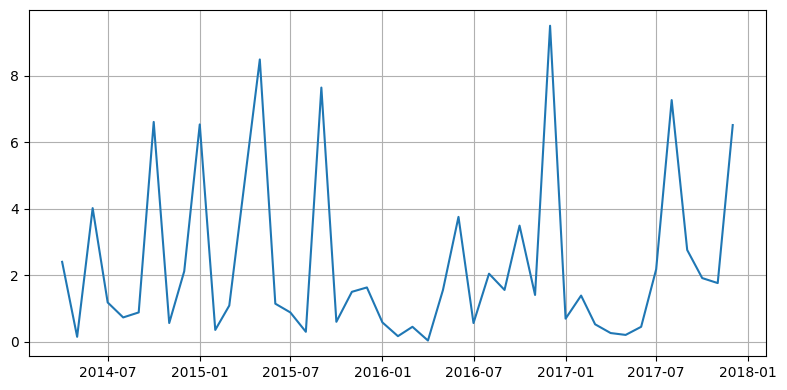

In [176]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df_month, x="Ship Date", y="Percent")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

In [177]:
# df_category = dataset.groupby(by=["Category", "Month"])["Sold"].aggregate("sum").reset_index()

# df_category.head(5)

df_category_per_date = dataset.groupby(by=["Category", "Month", "Ship Date"])["Sold"].aggregate("sum").reset_index()

df_category_per_date.head(5)

,Category,Month,Ship Date,Sold
0,Furniture,Agustus,2014-08-01,100
1,Furniture,Agustus,2014-08-02,140
2,Furniture,Agustus,2014-08-05,1420
3,Furniture,Agustus,2014-08-07,1140
4,Furniture,Agustus,2014-08-09,350


In [178]:
df_category_per_date['Ship Date']

0      2014-08-01
1      2014-08-02
2      2014-08-05
3      2014-08-07
4      2014-08-09
          ...    
2817   2017-09-25
2818   2017-09-26
2819   2017-09-27
2820   2017-09-28
2821   2017-09-29
Name: Ship Date, Length: 2822, dtype: datetime64[ns]

In [ ]:
# df_month = dataset.loc[(dataset['Ship Date'] >= '2014-01-07') & (dataset['Ship Date'] < '2017-12-31') & dataset['Ship Date'].dt.weekday == 6]
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%Y-%m-%d')

df_category_per_date = dataset.loc[
    (dataset['Ship Date'] >= '2014-08-01') & 
    # (dataset['Ship Date'].dt.weekday == 6) &
    (dataset['Ship Date'] < '2017-09-30') 
]

df_category_per_date.sort_values(by="Ship Date", ascending=True).head(5)

,Ship Date,Month,Year,Ship Mode,Area,Region,Category,Sub-Category,Sold,Profit
5272,2014-08-01,Agustus,2014,Standard Class,Kalimantan,West,Technology,Accessories,120,416400
6008,2014-08-01,Agustus,2014,Standard Class,Jawa,South,Office Supplies,Labels,170,918700
6007,2014-08-01,Agustus,2014,Standard Class,Kalimantan,South,Furniture,Chairs,70,220000
6009,2014-08-01,Agustus,2014,Standard Class,Sumatra,South,Furniture,Furnishings,30,111100
3138,2014-08-02,Agustus,2014,Standard Class,Bali,West,Technology,Phones,920,1368000


In [180]:
start_of_month_dates = pd.date_range(start='2014-01-01', end='2017-12-31', freq='MS')
df_category_per_date = df_category_per_date[df_category_per_date['Ship Date'].isin(start_of_month_dates)]
df_category_per_date

,Ship Date,Month,Year,Ship Mode,Area,Region,Category,Sub-Category,Sold,Profit
15,2014-09-01,September,2014,Second Class,Jawa,West,Office Supplies,Art,10,29800
16,2014-09-01,September,2014,Second Class,Sumatra,West,Technology,Phones,220,192200
17,2014-09-01,September,2014,Second Class,Bali,West,Office Supplies,Binders,30,88700
174,2016-11-01,November,2016,Standard Class,Jawa,West,Office Supplies,Storage,100,312700
175,2016-11-01,November,2016,Standard Class,Sumatra,West,Technology,Phones,310,272200
...,...,...,...,...,...,...,...,...,...,...
7952,2016-10-01,Oktober,2016,Standard Class,Papua,West,Technology,Copiers,480,1944000
7953,2016-10-01,Oktober,2016,Standard Class,Sulawesi,West,Technology,Phones,50,53700
7954,2016-10-01,Oktober,2016,Standard Class,Kalimantan,West,Office Supplies,Art,10,20100
7955,2016-10-01,Oktober,2016,Standard Class,Kalimantan,West,Furniture,Chairs,490,724800


In [181]:
df_category = df_category_per_date.groupby(by=["Category", "Month", "Ship Date"])["Sold"].aggregate("sum").reset_index().sort_values("Ship Date", ascending=True)
df_category

,Category,Month,Ship Date,Sold
0,Furniture,Agustus,2014-08-01,100
21,Office Supplies,Agustus,2014-08-01,170
55,Technology,Agustus,2014-08-01,120
18,Furniture,September,2014-09-01,20
79,Technology,September,2014-09-01,370
...,...,...,...,...
23,Office Supplies,Agustus,2017-08-01,200
2,Furniture,Agustus,2017-08-01,600
54,Office Supplies,September,2017-09-01,600
20,Furniture,September,2017-09-01,790


In [182]:
category = "Office Supplies"
df_category.query('Category == @category', inplace=True)
df_category["Percent"] = (df_category["Sold"] / df_category["Sold"].sum()) * 100
df_category = np.round(df_category, 0)
df_category

,Category,Month,Ship Date,Sold,Percent
21,Office Supplies,Agustus,2014-08-01,170,1.0
51,Office Supplies,September,2014-09-01,80,0.0
48,Office Supplies,Oktober,2014-10-01,240,1.0
45,Office Supplies,November,2014-11-01,40,0.0
25,Office Supplies,Desember,2014-12-01,390,2.0
31,Office Supplies,Januari,2015-01-01,2840,16.0
28,Office Supplies,Februari,2015-02-01,190,1.0
39,Office Supplies,Maret,2015-03-01,40,0.0
42,Office Supplies,Mei,2015-05-01,4130,24.0
36,Office Supplies,Juni,2015-06-01,240,1.0


In [183]:
df_category["Sold"].sum()


17280

In [184]:
df_category["Percent"].sum()

98.0

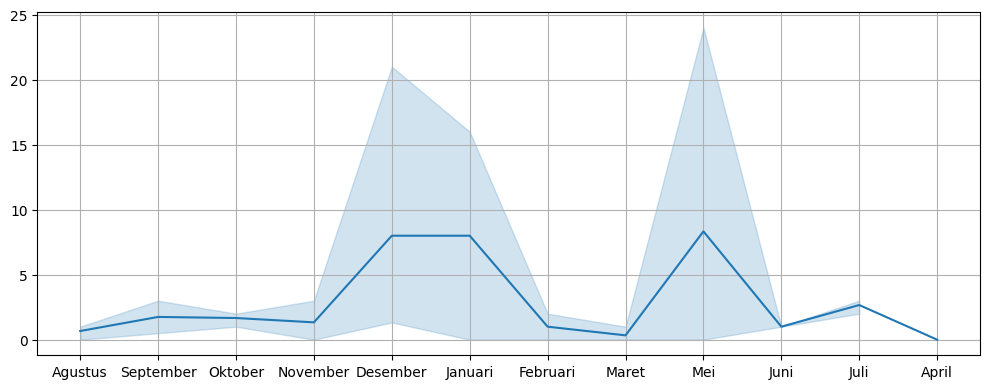

In [195]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df_category, x="Month", y="Percent")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

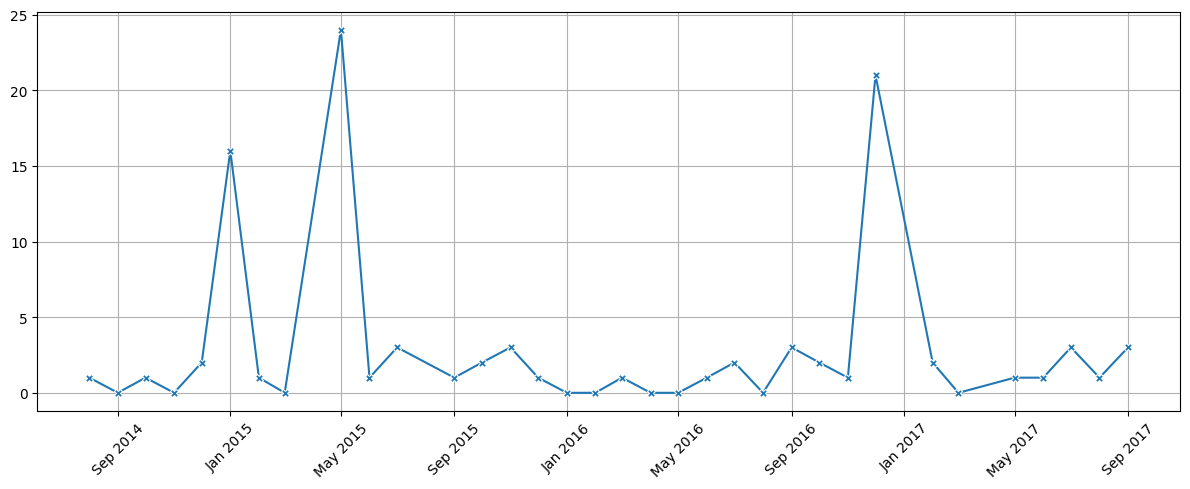

In [203]:
df_category["Ship Date"] = pd.to_datetime(df_category["Ship Date"])

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df_category, x="Ship Date", y="Percent", marker="X")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)

ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [186]:
df_area_island = pd.pivot_table(data=dataset, index="Category", columns="Area", values="Sold", aggfunc="sum")
df_area_island.columns = ["Bali", "Jawa", "Kalimantan", "Papua", "Sulawesi", "Sumatra"]

df_area_island

,Bali,Jawa,Kalimantan,Papua,Sulawesi,Sumatra
Category,,,,,,
Furniture,69880,53430,103160,94320,92870,75230
Office Supplies,81500,90510,125980,133000,116750,103320
Technology,93280,107560,131800,161040,137640,90630


In [187]:
df_area_island['Total'] = df_area_island.sum(axis=1)
print(df_area_island['Total'])
print("")
print(df_area_island)

Category
Furniture          488890
Office Supplies    651060
Technology         721950
Name: Total, dtype: int64

                  Bali    Jawa  Kalimantan   Papua  Sulawesi  Sumatra   Total
Category                                                                     
Furniture        69880   53430      103160   94320     92870    75230  488890
Office Supplies  81500   90510      125980  133000    116750   103320  651060
Technology       93280  107560      131800  161040    137640    90630  721950


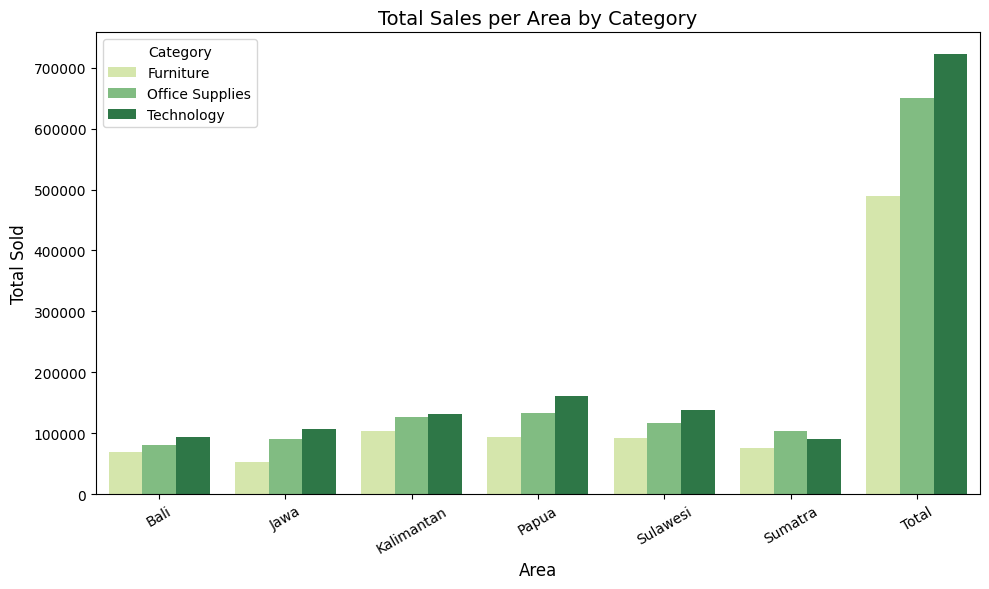

In [192]:
df_area_island_reset = df_area_island.reset_index()

df_melted = df_area_island_reset.melt(id_vars="Category", var_name="Area", value_name="Sold")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Area", y="Sold", hue="Category", palette="YlGn")

plt.title("Total Sales per Area by Category", fontsize=14)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Total Sold", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Category")

plt.tight_layout()
plt.show()


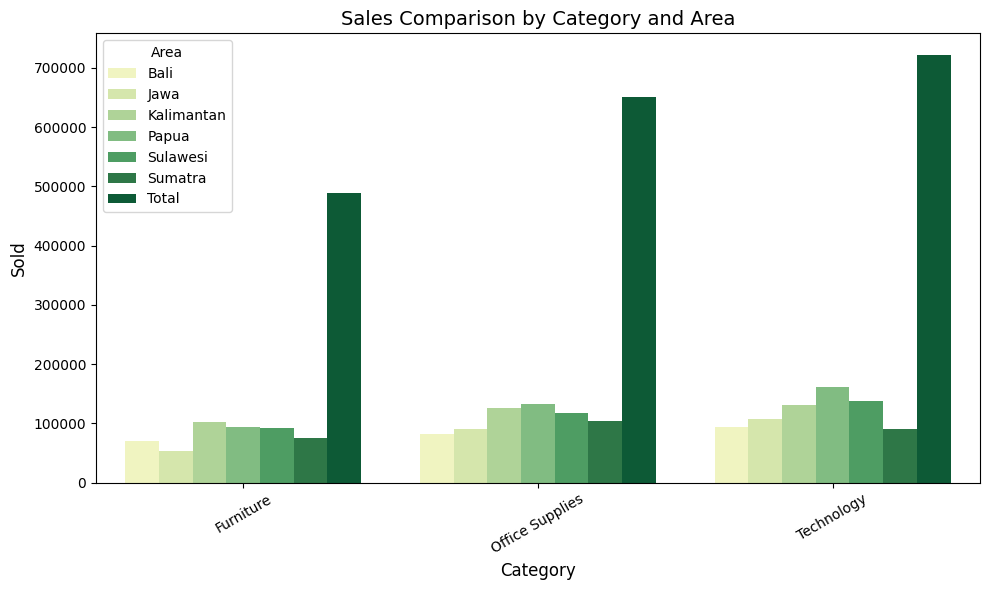

In [193]:
df_area_island_reset = df_area_island.reset_index()

df_melted = df_area_island_reset.melt(id_vars="Category", var_name="Area", value_name="Sold")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Category", y="Sold", hue="Area", palette="YlGn")

plt.title("Sales Comparison by Category and Area", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sold", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Area")

plt.tight_layout()
plt.show()
